## 下載資料集

## 讀取資料集
### Data Augmentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 4
img_size = 150

train_datagen = ImageDataGenerator( 
                                    rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.05,
                                    height_shift_range=0.05,
                                    horizontal_flip=True,
                                    vertical_flip=False,
                                    fill_mode='reflect', 
                                    zoom_range=0.01,
                                    validation_split=0.3
                                 )
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
img_shape = (img_size, img_size)

# 訓練集
train_generator = train_datagen.flow_from_directory(
                                                    './datasets/dog_cat/train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=4,
                                                    subset="training",
                                                    seed=42,                                                
                                                    class_mode='categorical')
# 驗證集
valid_generator = train_datagen.flow_from_directory(
                                                   './datasets/dog_cat/train',
                                                   target_size=(img_size, img_size),
                                                   batch_size=batch_size,
                                                   subset="validation",
                                                   seed=42,
                                                   class_mode='categorical')
# 測試集
test_generator = test_datagen.flow_from_directory(
                                                   './datasets/dog_cat/test',
                                                   target_size=(img_size, img_size),
                                                   batch_size=1,
                                                   shuffle=False,
                                                   class_mode='categorical')

Found 18 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 16 images belonging to 3 classes.


In [69]:
classes = list(train_generator.class_indices) # 類別名稱
num_classes = len(train_generator.class_indices) # 類別數量
label_dict = dict((v,k) for k,v in (train_generator.class_indices).items()) # flip k,v

print(f'類別名稱: {classes}')
print(f'類別數量: {num_classes}')
print(f'標籤字典: {label_dict}')

類別名稱: ['cat', 'dog']
類別數量: 2
標籤字典: {0: 'cat', 1: 'dog'}


### Visualize the dataset

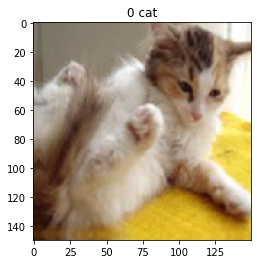

In [59]:
img , label = train_generator.next()
label=labels[0].argmax()
plt.title(f'{label} {classes[label]}')
plt.imshow(img[0])
plt.show()

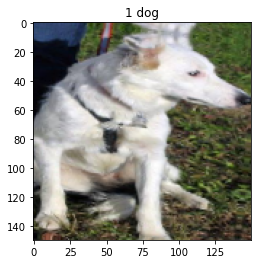

In [51]:
for idx, (imgs, labels) in enumerate(train_generator):
    if idx==1:
        break
    label=labels[0].argmax()
    plt.title(f'{label} {classes[label]}')
    plt.imshow(imgs[0])